# СОДЕРЖАНИЕ

1. Описание датасета, метаданные.
1. Подключение библиотек и их настройка, формирование датасета.
2. Предобработка данных.

# ОПИСАИНЕ ДАТАСЕТА, МЕТАДАННЫЕ.

[Набор данных](https://www.kaggle.com/datasets/oleksiimartusiuk/e-commerce-data-shein/data) был взят с сайта Kaggle и представляет из себя "грязные" данные  международного онлайн-ритейлера быстрой моды, которые автор нам предлагает очистить. Этим мы и займемся.

Описание признаков:

1. **goods-title-link--jump:**
Ссылка на товар или название товара, которое ведет на страницу с подробной информацией.

2. **goods-title-link--jump href:**
URL-ссылка на страницу товара.

3. **rank-title:**
Рейтинг товара.

4. **rank-sub:**
Дополнительная информация о подкатегория.

5. **price:**
Цена товара.

6. **discount:**
Скидка на товар (в процентах).

7. **selling_proposition:**
Количество недавно проданных товаров (крупные объемы продаж).

8. **color-count:**
Количество доступных цветов или вариантов товара.

9. **goods-title-link:**
Название товара или ссылка на товар.

10. **blackfridaybelts-bg src:**
Возможно, это ссылка на фоновое изображение, связанное с акцией Black Friday.

11. **blackfridaybelts-content:**
Контент, связанный с акцией Black Friday.

12. **product-locatelabels-img src:**
Ссылка на изображение метки или лейбла товара.

<a id="section1"></a>
# ПОДКЛЮЧЕНИЯ И НАСТРОЙКИ.

In [ ]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
plt.style.use('dark_background')

# Монтируем Google Drive
drive.mount('/content/drive')

# Путь к директории с CSV-файлами
directory_path = '/content/drive/My Drive/Colab Notebooks/Project/Data/'

# Получаем список всех CSV-файлов в директории
csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]

# Создаем пустой DataFrame для объединения данных
combined_df = pd.DataFrame()

# Читаем и объединяем все CSV-файлы, создаем признак "категория"
for file in csv_files:
    file_path = os.path.join(directory_path, file)
    category = file.split('-')[-2]
    df = pd.read_csv(file_path)
    df['category'] = category
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# Выводим результат
print(f"Объединенный DataFrame содержит {len(combined_df)} строк.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Объединенный DataFrame содержит 82105 строк.


<a id="section2"></a>
# ОЧИСТКА И ОБРАБОТКА ДАННЫХ.

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82105 entries, 0 to 82104
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   goods-title-link--jump        664 non-null    object 
 1   goods-title-link--jump href   664 non-null    object 
 2   rank-title                    14605 non-null  object 
 3   rank-sub                      14605 non-null  object 
 4   price                         82103 non-null  object 
 5   discount                      54977 non-null  object 
 6   selling_proposition           54364 non-null  object 
 7   color-count                   19743 non-null  float64
 8   goods-title-link              81427 non-null  object 
 9   category                      82105 non-null  object 
 10  blackfridaybelts-bg src       3791 non-null   object 
 11  blackfridaybelts-content      3791 non-null   object 
 12  product-locatelabels-img src  3622 non-null   object 
dtypes

Выведем первичную информацию по датасету:


*   12 признаков, которые содержат категориальные значения и
1 признак, содержащий числовые значения.
*   82105 строки.
*   Имеются пропущенные значения во всех признаках, кроме созданного нами признака "category".

Проверим наличие дубликатов и избавимся от них, если они имеются:

In [ ]:
# Считаем количество дубликатов
duplicate_rows = combined_df.duplicated().sum()
print(f"Найдено {duplicate_rows} повторяющихся строк.")

# Удаляем дубликаты, если они есть
if duplicate_rows > 0:
    combined_df = combined_df.drop_duplicates(ignore_index=True)
    print(f"После удаления дубликатов DataFrame содержит {len(combined_df)} строк.")
else:
    print("Дубликаты не найдены.")

Найдено 2876 повторяющихся строк.
После удаления дубликатов DataFrame содержит 79229 строк.


Проанализируем отсутствующие значения подробнее:

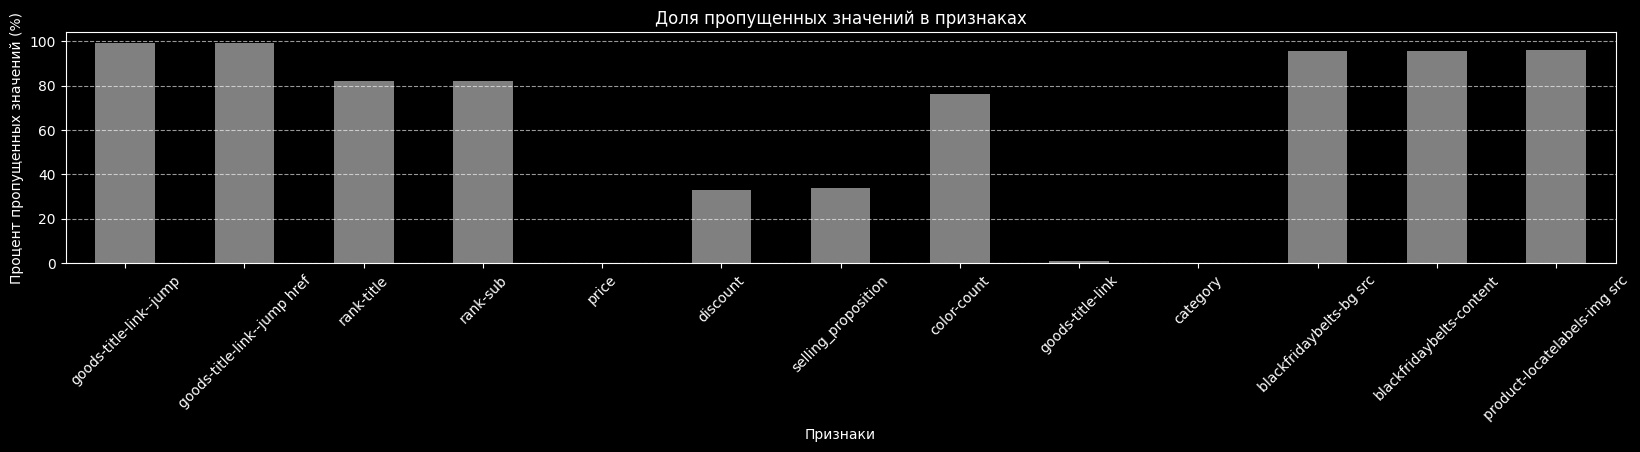

In [ ]:
# @title
missing_values = combined_df.isnull().mean() * 100

plt.figure(figsize=(20, 3))
missing_values.plot(kind='bar', color='grey' )

plt.title('Доля пропущенных значений в признаках')
plt.xlabel('Признаки')
plt.ylabel('Процент пропущенных значений (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

Опираясь на визуализацию пропущенных значений и содержание признаков, избавимся от бесполезных значений. Такими будут являться:

*   goods-tilte-link--jump - ссылка на товар.
*   goods-title-link--jump href - также, ссылка на товар.
*   rank-sub - дополнительная информация о подкатегории.
*   blackfridaybelts-bg src - ссылка на фоновое изображение, связанное с акцией Black Friday.
*   product-locatelabels-img src - Ссылка на изображение метки или лейбла товара.
*   goods-title-link - Название товара или ссылка на товар.

In [ ]:
# Создаем список признаков на удаление
data_to_drop = ['goods-title-link--jump', 'goods-title-link--jump href',
                'blackfridaybelts-bg src', 'product-locatelabels-img src',
                'goods-title-link', 'rank-sub']
# Удаляем из датафрейма нерелевантные признаки
combined_df.drop(columns=data_to_drop, inplace=True)

In [ ]:
combined_df.head(10)

,rank-title,price,discount,selling_proposition,color-count,category,blackfridaybelts-content
0,#10 Best Sellers,$1.36,-20%,NaN,NaN,electronics,NaN
1,#1 Best Sellers,$2.32,-20%,NaN,NaN,electronics,NaN
2,NaN,$1.70,NaN,600+ sold recently,NaN,electronics,NaN
3,#5 Best Sellers,$0.38,-71%,NaN,8.0,electronics,NaN
4,#9 Best Sellers,$3.10,NaN,NaN,7.0,electronics,NaN
5,#10 Best Sellers,$0.90,-40%,NaN,NaN,electronics,NaN
6,NaN,$9.80,-4%,600+ sold recently,7.0,electronics,NaN
7,#1 Best Sellers,$1.30,NaN,NaN,NaN,electronics,NaN
8,NaN,$1.60,NaN,1.3k+ sold recently,NaN,electronics,NaN
9,NaN,$1.70,NaN,50+ sold recently,NaN,electronics,NaN


Теперь преобразуем данные в оставшихся признаках.
*   1. В признаке rank-title необходимо извлечь числовые значения, преобразовать в float.
*   2. В признаке price необходимо избавиться от знака доллара, преобразовать в float.
*   3. Признак discount необходимо преобразовать в float, убрать '%'.
*   4. В признаке selling_proposition необходимо извлечь числовые значения,  преобразовать в float.
*   5. В признаке color-count необходимо заполнить пустые значения.
*   6. В признаке blackfridaybelts-content необходимо избавиться от знака доллара, слова 'Save' и преобразовать в float.


1. Обработка признака "rank-title":

In [ ]:
# Создаем функцию обработки значений для признака
def rank_title_processing(rank_title):
    if pd.isna(rank_title):
       return 0.0
    rank_title = str(rank_title).lower()
    rank_title = re.sub(r'[\# bestsellers]', '', rank_title)
    return float(rank_title)
# Применяем функцию обработки к признаку, создаем производный
combined_df['rank-number'] = combined_df['rank-title'].apply(rank_title_processing)
# Удаляем признак rank-title из датафрейма
combined_df.drop(columns='rank-title', inplace=True)

2. Обработка признака "price":

In [ ]:
# Убираем знак доллара в признаке, преобразуем в float
combined_df['price'] = combined_df['price'].replace('[\$,]', '', regex=True).astype(float)

3. Обработка признака "discount":

In [ ]:
# Создаем функцию обработки значений для признака
def discount_processing(discount):
    if pd.isna(discount):
        return 0.0
    discount = str(discount).replace('%', '')
    return float(discount) / 100
# Применяем функцию обработки к признаку
combined_df['discount'] = combined_df['discount'].apply(discount_processing)

4. Обработка признака "selling_proposition":

In [ ]:
# Создаем функцию обработки значений для признака
def selling_proposition_processing(selling_proposition):
    if pd.isna(selling_proposition):
        return 0.0
    selling_proposition = str(selling_proposition).lower()
    selling_proposition = re.sub(r'[+ soldrecently]', '', selling_proposition)
    if 'k' in selling_proposition:
        return int(float(selling_proposition.replace('k', '')) * 1000)
    else:
        return int(selling_proposition)
# Применяем функцию обработки к признаку
combined_df['selling_proposition'] = combined_df['selling_proposition'].apply(selling_proposition_processing)

5. Обработка признака "color-count":

In [ ]:
# Заполняем пропущенные значения в признаке
combined_df['color-count'] = combined_df['color-count'].fillna(0)

6. Обработка признака "blackfridaybelts-content":

In [ ]:
# Создаем функцию обработки значений для признака
def blackfridaybelts_content_processing(blackfridaybelts_content):
    if pd.isna(blackfridaybelts_content):
       return 0.0
    blackfridaybelts_content = str(blackfridaybelts_content).lower()
    blackfridaybelts_content = re.sub(r'[\$ save]', '', blackfridaybelts_content)
    return float(blackfridaybelts_content)
# Применяем функцию обработки к признаку
combined_df['blackfridaybelts-content'] = combined_df['blackfridaybelts-content'].apply(blackfridaybelts_content_processing)

Выполнив обработку для каждого признака, проверим результат:

In [ ]:
combined_df.tail()

,price,discount,selling_proposition,color-count,category,blackfridaybelts-content,rank-number
79224,1.91,-0.40,0.0,0.0,underwear_and_sleepwear,0.0,0.0
79225,3.99,-0.07,900.0,0.0,underwear_and_sleepwear,0.0,0.0
79226,4.89,-0.06,300.0,0.0,underwear_and_sleepwear,0.0,0.0
79227,5.99,-0.20,600.0,0.0,underwear_and_sleepwear,0.0,0.0
79228,6.59,-0.15,200.0,0.0,underwear_and_sleepwear,0.0,0.0


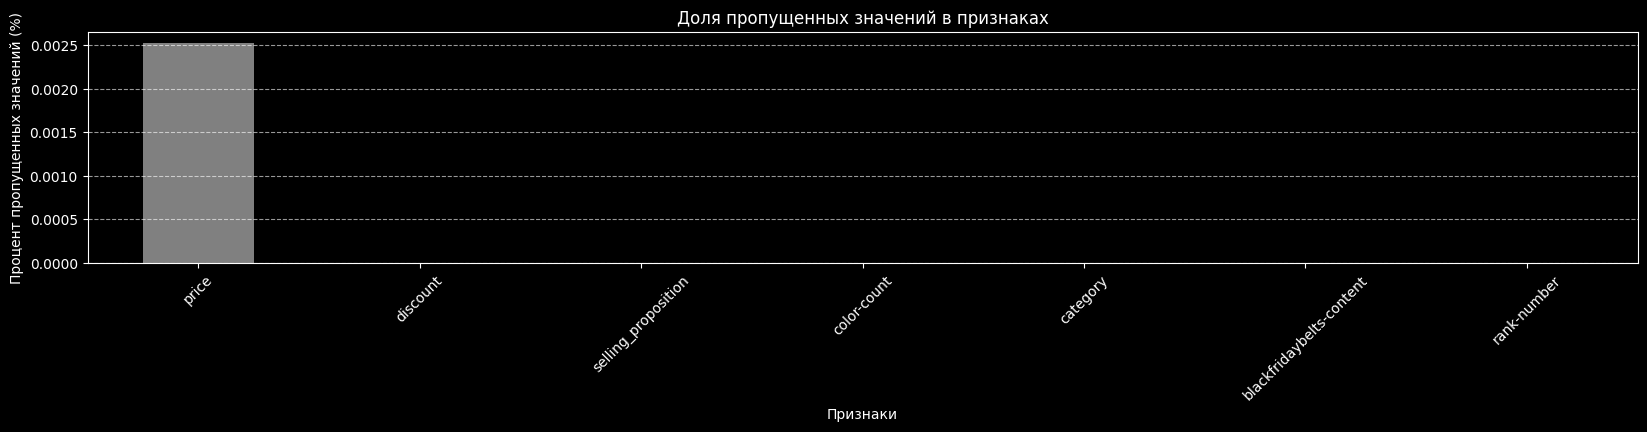

In [ ]:
# @title
missing_values = combined_df.isnull().mean() * 100

plt.figure(figsize=(20, 3))
missing_values.plot(kind='bar', color='grey' )  # Строим столбчатую диаграмму


plt.title('Доля пропущенных значений в признаках')
plt.xlabel('Признаки')
plt.ylabel('Процент пропущенных значений (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

Как видим, остались пропущенные значения в признаке 'price'. Чтобы их заполнить, посчитаем среднюю цену по каждой категории, а следом напишем функцию. Но для начала необходимо оценить распределение признака 'price', чтобы принять решение о применении той или иной меры центральной тенденции.

In [ ]:
combined_df.describe()

,price,discount,selling_proposition,color-count,blackfridaybelts-content,rank-number
count,79227.000000,79229.000000,79229.000000,79229.000000,79229.000000,79229.000000
mean,22.721623,-0.147830,639.504348,1.919095,0.113529,0.923551
std,3158.155186,0.172464,1442.743320,4.213351,0.754490,2.320607
min,0.150000,-0.920000,0.000000,0.000000,0.000000,0.000000
25%,2.500000,-0.230000,0.000000,0.000000,0.000000,0.000000
50%,5.900000,-0.080000,100.000000,0.000000,0.000000,0.000000
75%,11.490000,0.000000,600.000000,0.000000,0.000000,0.000000
max,888888.000000,0.000000,10000.000000,40.000000,52.300000,10.000000


Сразу можно заметить аномалию в максимальном значении признака 'price'. Избавимся от нее.

In [ ]:
combined_df[combined_df.price == 888888.000000]

,price,discount,selling_proposition,color-count,category,blackfridaybelts-content,rank-number
60193,888888.0,0.0,0.0,0.0,home_textile,0.0,0.0


In [ ]:
# Удаляем строку с ошибкой
combined_df.drop([60193], inplace=True)

<Axes: ylabel='price'>

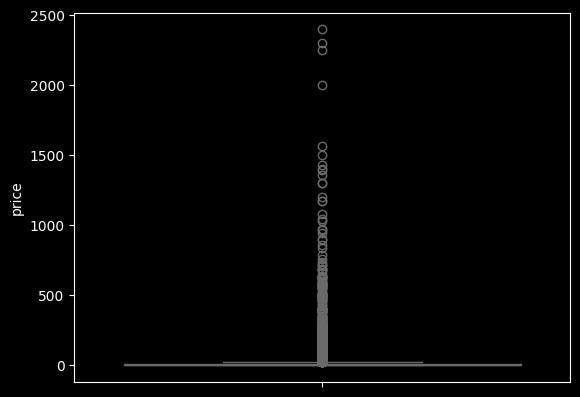

In [ ]:
# Строим "Ящик с усами" для признака "price"
sns.boxplot(combined_df['price'])

В признаке "price" много выбросов. Самая устойчивая к выбросам мера центральности - медиана. Применим ее.

In [ ]:
# Считаем среднюю цену по категориям
mean_prices_by_category = combined_df.groupby('category')['price'].median()
print(mean_prices_by_category)

category
appliances                    16.100
automotive                     3.400
baby_and_maternity             7.645
bags_and_luggage               5.500
beauty_and_health              2.380
curve                         11.990
electronics                    2.275
home_and_kitchen               2.600
home_textile                   6.400
jewelry_and_accessories        2.000
kids                           8.000
mens_clothes                  11.090
office_and_school_supplies     2.300
pet_supplies                   3.000
shoes                         12.700
sports_and_outdoors            6.790
swimwear                      11.290
tools_and_home_improvement     4.500
toys_and_games                 3.280
underwear_and_sleepwear        6.290
womens_clothing               10.770
Name: price, dtype: float64


In [ ]:
# Пишем функцию для заполнения пропущенных значений
def filling_missing_values(combined_df):
    if pd.isna(combined_df['price']):
       return mean_prices_by_category[combined_df['category']]
    return combined_df['price']
# Применяем функцию к признаку
combined_df['price'] = combined_df.apply(filling_missing_values, axis=1)

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79228 entries, 0 to 79228
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     79228 non-null  float64
 1   discount                  79228 non-null  float64
 2   selling_proposition       79228 non-null  float64
 3   color-count               79228 non-null  float64
 4   category                  79228 non-null  object 
 5   blackfridaybelts-content  79228 non-null  float64
 6   rank-number               79228 non-null  float64
dtypes: float64(6), object(1)
memory usage: 4.8+ MB


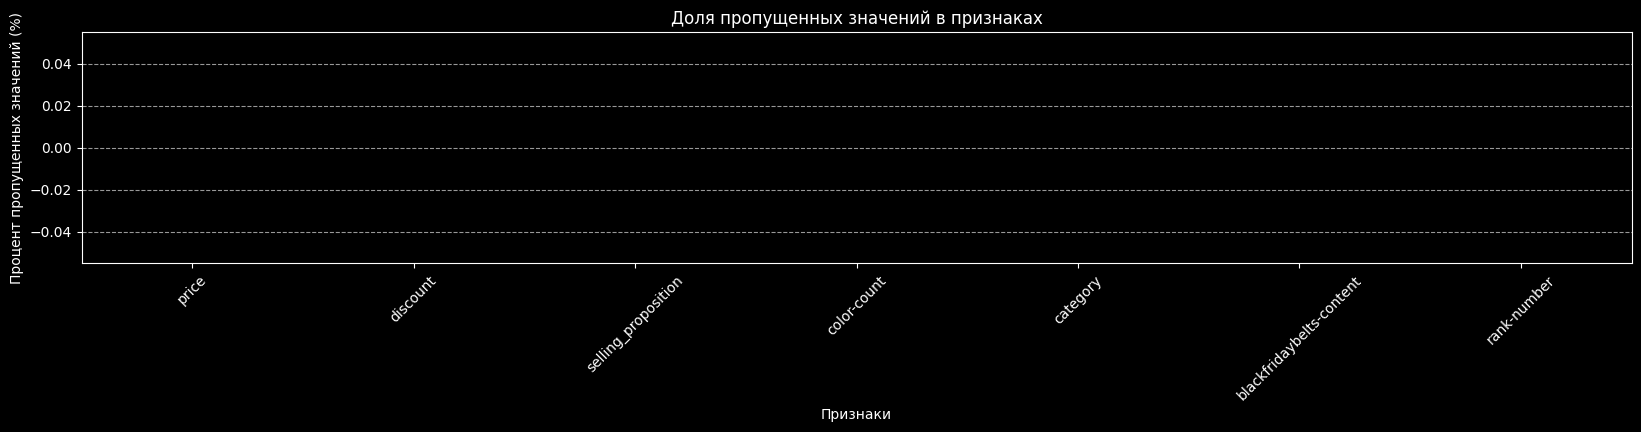

In [ ]:
# @title
missing_values = combined_df.isnull().mean() * 100

plt.figure(figsize=(20, 3))
missing_values.plot(kind='bar', color='grey' )  # Строим столбчатую диаграмму


plt.title('Доля пропущенных значений в признаках')
plt.xlabel('Признаки')
plt.ylabel('Процент пропущенных значений (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

Отлично, пропущенных значений не осталось. Теперь переименуем названия признаков, чтобы в дальнейшем к ним было проще обращаться и не возникало ошибок.

In [ ]:
combined_df.rename(columns={'selling_proposition': 'sales_props', 'color-count': 'color_count', 'blackfridaybelts-content': 'bf_content', 'rank-number':'rank_number'}, inplace=True)

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79228 entries, 0 to 79228
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        79228 non-null  float64
 1   discount     79228 non-null  float64
 2   sales_props  79228 non-null  float64
 3   color_count  79228 non-null  float64
 4   category     79228 non-null  object 
 5   bf_content   79228 non-null  float64
 6   rank_number  79228 non-null  float64
dtypes: float64(6), object(1)
memory usage: 4.8+ MB


Сохраним наши данные для дальнейшей работы.

In [ ]:
# Указываем директорию для сохранения обработанных данных
target_directory ='/content/drive/My Drive/Colab Notebooks/Project/Data/Combined'
# Указываем имя файля
file_name = 'combined_df.csv'
# Формируем полный путь к файлу
full_path = os.path.join(target_directory, file_name)
# Сохраняем DataFrame в CSV
combined_df.to_csv(full_path, index=False, encoding='utf-8')
print(f'Файл успешно сохранен: {full_path}')


Файл успешно сохранен: /content/drive/My Drive/Colab Notebooks/Project/Data/Combined/combined_df.csv


In [ ]:
print(os.listdir(target_directory))

['combined_df.csv']


Данные сохранены, можно приступать к следующему этапу.